# Simple Iris prediction

In [50]:
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = pd.DataFrame(iris.data, columns = ["petal length", "petal width","sepal length","sepal width"])
y = pd.DataFrame(iris.target)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 9)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = "lbfgs", multi_class="auto")
clf.fit(x_train_std, y_train)
y_pred = clf.predict(x_test_std)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

import numpy as np
y_test = np.array(y_test).reshape(1, -1)

y_test == y_pred

1.0


/home/aditya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]])

#### Variation of flower with respect to different flower attributes 

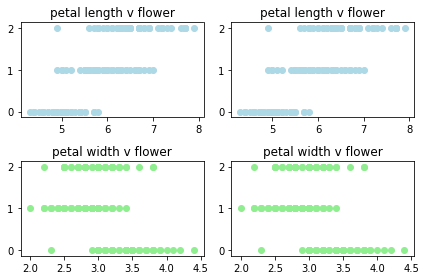

In [51]:
x_petal_length = x.iloc[:,0]
x_petal_width = x.iloc[:,1]
x_sepal_length = x.iloc[:,2]
x_sepal_width = x.iloc[:,3]

x_attributes = [x_petal_length, x_petal_width,x_sepal_length, x_sepal_width]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 2, ncols = 2)
color = ["lightblue", "lightgreen","salmon","wheat"]
titles = ["petal length v flower","petal width v flower","sepal length v flower", "sepal width v flower"]
for axes, x_axis, col, title in zip(ax,x_attributes, color, titles):
    for axis in axes:
        axis.scatter(x_axis, y, color = col)
        axis.set_title(title)
        
fig.tight_layout()

Accuracy score 1.0


/home/aditya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/aditya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


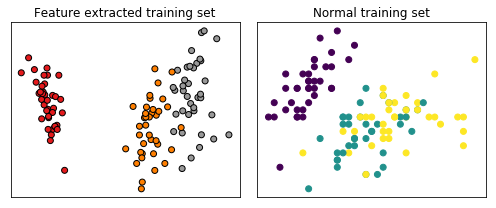

In [52]:
import sklearn.datasets as dataset
iris = dataset.load_iris()
X, y = iris.data, iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state = 10, stratify = y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
pca = LDA(n_components=3)
x_train_pca = pca.fit_transform(x_train_std,y_train)
x_test_pca = pca.fit_transform(x_test_std,y_test)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7,3))
ax[0].scatter(x_train_pca[:,0],x_train_pca[:,1],c = y_train, cmap=plt.cm.Set1,edgecolor='k')
ax[0].set_title("Feature extracted training set")



from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 10)
lr.fit(x_train_pca,y_train)
y_pred = lr.predict(x_test_pca)

ax[1].scatter(x_train_std[:,0],x_train_std[:,1],c = y_train)
ax[1].set_title("Normal training set")

for axes in ax:
    axes.set(xticks = [], yticks = [])
fig.tight_layout()
from sklearn.metrics import accuracy_score
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))

Text(0.5, 0.92, 'Feature extracted training set')

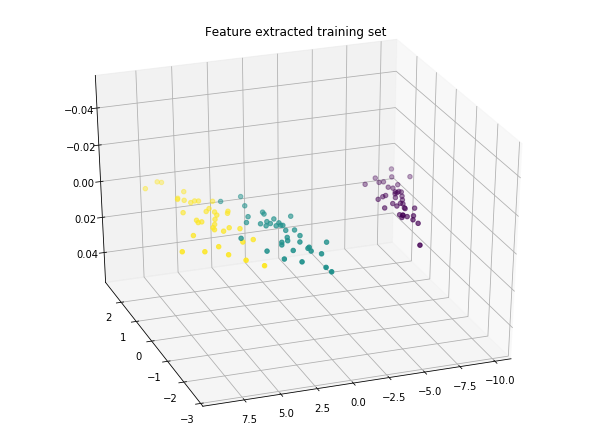

In [53]:
from mpl_toolkits.mplot3d.axes3d import Axes3D 
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize = (8,6))
ax = Axes3D(fig, elev = -150, azim = 110)
ax.scatter(x_train_pca[:,0],x_train_pca[:,1],c = y_train)
ax.set_title("Feature extracted training set")

Text(0.5, 0.92, 'Actual training set')

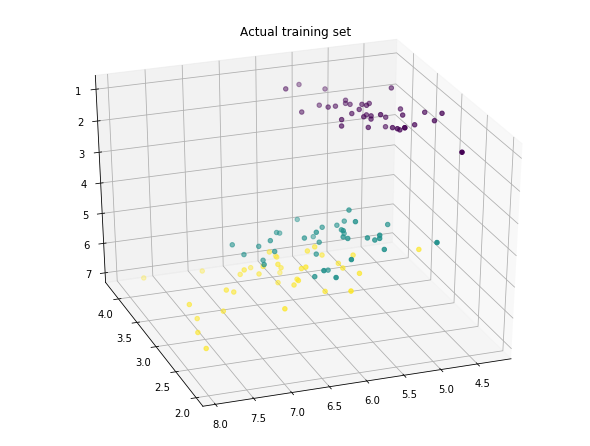

In [54]:
from mpl_toolkits.mplot3d.axes3d import Axes3D 
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize = (8,6))
ax = Axes3D(fig, elev = -150, azim = 110)
ax.scatter(x_train[:,0],x_train[:,1],x_train[:,2],c = y_train)
ax.set_title("Actual training set")

# Wine  

In [55]:
import sklearn.datasets as dataset
wine = dataset.load_wine()
X, y = wine.data, wine.target

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 10, stratify = y)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
x_train_lda = lda.fit_transform(x_train_std, y_train)
x_test_lda = lda.fit(x_test,y_test).transform(x_test)

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_lda, y_train)

/home/aditya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/aditya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

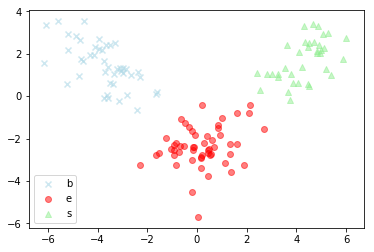

In [61]:
plt.scatter(x_train_lda[y_train == 0,0], x_train_lda[y_train == 0,1],
            color = "lightblue",
            marker = "x",
           label = "Y = 0",
           alpha = 0.6)
plt.scatter(x_train_lda[y_train == 1,0], x_train_lda[y_train == 1,1],
            color = "red",
            marker = "o",
           label = "Y = 1",
           alpha = 0.5,

           )
plt.scatter(x_train_lda[y_train == 2,0], x_train_lda[y_train == 2,1],
            color = "lightgreen",
            marker = "^",
           label = "Y = 2",
           alpha = 0.5
           )

plt.legend("best")

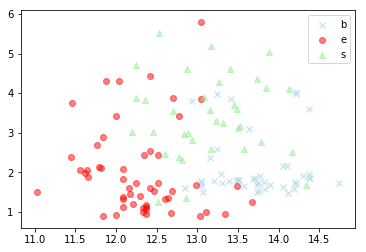

In [63]:
plt.scatter(x_train[y_train == 0,0], x_train[y_train == 0,1],
            color = "lightblue",
            marker = "x",
           label = "Y = 0",
           alpha = 0.6)
plt.scatter(x_train[y_train == 1,0], x_train[y_train == 1,1],
            color = "red",
            marker = "o",
           label = "Y = 1",
           alpha = 0.5,

           )
plt.scatter(x_train[y_train == 2,0], x_train[y_train == 2,1],
            color = "lightgreen",
            marker = "^",
           label = "Y = 2",
           alpha = 0.5
           )

plt.legend("best")

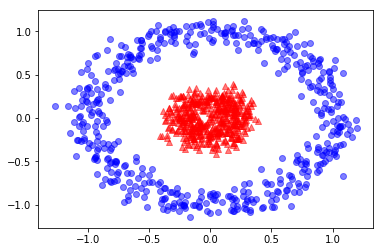

In [159]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000,
                    random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==1,0],X[y==1,1],marker = "^",
           color = "red",
           alpha = "0.5")
plt.scatter(X[y==0,0],X[y==0,1],marker = "o",
           color = "blue",
           alpha = "0.5")

In [160]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 1,test_size = 0.2)

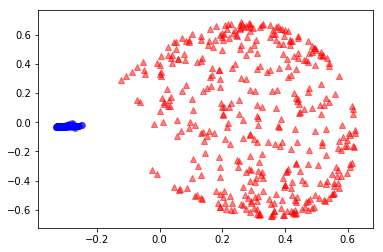

In [161]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel = "rbf", gamma = 15,random_state=4)
x_train_kpca = kpca.fit_transform(x_train)
x_test_kpca = kpca.fit_transform(x_test)

plt.scatter(x_train_kpca[y_train==1,0],x_train_kpca[y_train==1,1],marker = "^",
           color = "red",
           alpha = "0.5")
plt.scatter(x_train_kpca[y_train==0,0],x_train_kpca[y_train==0,1],marker = "o",
           color = "blue",
           alpha = "0.5")

/home/aditya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


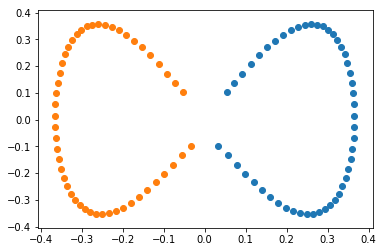

In [199]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 100, random_state = 1)
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel = "rbf", gamma = 15)

x_train_kpca = kpca.fit_transform(X)

plt.scatter(x_train_kpca[y==0,0], x_train_kpca[y==0,1])
plt.scatter(x_train_kpca[y==1,0], x_train_kpca[y==1,1])


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 1, test_size = 0.2)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [200]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

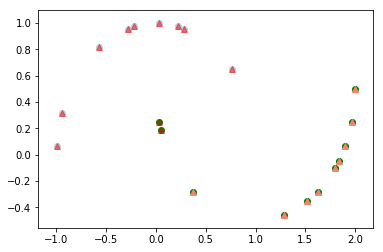

In [201]:
plt.scatter(x_test[y_test == 0, 0], x_test[y_test == 0,1], color = "lightblue",marker = "o")
plt.scatter(x_test[y_test == 1, 0], x_test[y_test == 1,1], color = "green",marker = "o")
plt.scatter(x_test[y_pred == 0, 0], x_test[y_pred == 0,1], color = "red", marker = "^", alpha = 0.5)
plt.scatter(x_test[y_pred == 1, 0], x_test[y_pred == 1,1], color = "salmon", marker = "^")